<a href="https://colab.research.google.com/github/master-david445/ENG-Basecamp-AI-Track-Submissions-/blob/main/week3_visualizaton.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##**Week 3 Challenge; Dataset Dashboard**

In [28]:
#I'm importing this for data manipulation and loading
import pandas as pd

#this one for numerical operations
import numpy as np

#this one for data visualization
import matplotlib.pyplot as plt

#hthos one for prettier without giving me migraine
import seaborn as sns

#plotly for the interactive visuals
import plotly.express as px

In [ ]:
#like in the previous task I've got to install kaggle
!pip install kaggle --quiet

#turns out I've got to install plotly too
!pip install plotly --quiet

In [ ]:
#importing the kaggle library to be able to interact with tnier datasets
import kagglehub

#this was imported from python to manipulate the path of the csv file
import os

# Download latest version
path = kagglehub.dataset_download("saloni1712/co2-emissions")

#this line prints the local path where the dataset files are store
print("Path to dataset files:", path)

#this line creates that path for the csv file
csv_file_path = os.path.join(path, "dataset.csv")

#and finally, this one loads the dataset, and I also assigned it a variable for easy calling
df_CO = pd.read_csv(csv_file_path)
print(df_CO)

#in summary the code in this cell is responsible for downloading the dataset, locating thecsv file within it, turning the csv file into a dataframe using pandas and then displays the loaded data

Using Colab cache for faster access to the 'co2-emissions' dataset.
Path to dataset files: /kaggle/input/co2-emissions
          country        date                  sector      value   timestamp
0          Brazil  01/01/2019                   Power   0.096799  1546300800
1           China  01/01/2019                   Power  14.816100  1546300800
2       EU27 & UK  01/01/2019                   Power   1.886490  1546300800
3          France  01/01/2019                   Power   0.051217  1546300800
4         Germany  01/01/2019                   Power   0.315002  1546300800
...           ...         ...                     ...        ...         ...
135403     Russia  31/05/2023  International Aviation   0.016524  1685491200
135404      Spain  31/05/2023  International Aviation   0.068408  1685491200
135405         UK  31/05/2023  International Aviation   0.103774  1685491200
135406         US  31/05/2023  International Aviation   0.200409  1685491200
135407      WORLD  31/05/2023  Int

In [ ]:
#this prints a quick summary of the dataset tosee what we're dealing with
df_CO.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 135408 entries, 0 to 135407
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   country    135408 non-null  object 
 1   date       135408 non-null  object 
 2   sector     135408 non-null  object 
 3   value      135408 non-null  float64
 4   timestamp  135408 non-null  int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 5.2+ MB


In [ ]:
#this displays a more descriptive summary of the dataset in a statiscal way.
#I did this to have a rough idea of the datsset statistics
df_CO.describe()

,value,timestamp
count,135408.000000,1.354080e+05
mean,2.359439,1.615896e+09
std,5.908582,4.020589e+07
min,0.000078,1.546301e+09
25%,0.078661,1.581098e+09
50%,0.314597,1.615896e+09
75%,1.636632,1.650694e+09
max,46.263500,1.685491e+09


In [ ]:
# Quick summary stats for CO2 emissions
#I did this to take quick look at the emiisions rates
print(df_CO['value'].describe())

# How emissions are distributed across countries (latest year)
latest_date = df_CO['date'].max()
df_latest = df_CO[df_CO['date'] == latest_date]

# Top 10 emitters in the latest year
top_emitters = df_latest.sort_values(by='value', ascending=False).head(10)
print(top_emitters[['country', 'value']])

count    135408.000000
mean          2.359439
std           5.908582
min           0.000078
25%           0.078661
50%           0.314597
75%           1.636632
max          46.263500
Name: value, dtype: float64
      country     value
20453   WORLD  38.61470
43021   WORLD  28.54570
20441   China  16.63140
65589   WORLD  16.54110
88157   WORLD  15.24130
43009   China  11.94320
43016     ROW   9.58565
20448     ROW   7.48731
65584     ROW   6.04449
88152     ROW   5.05516


# **Main Question**

*How have global CO₂ emissions changed over time, and which countries contribute the most?*

# **Sub-Questions (My Storyline)**


* How have global CO₂ emissions
volved from 2019 to 2023?


* which countries contribute the most to CO₂ emissions in recent years?

* Which sector contributes most to global co2 emissions?


* How have emissions from different sectors changed over time ?

* What is the Global emission rate of each country?


* How does each country's CO2 profile differ by sector?



# 1.  How have global CO2 emissions evolved from 2019 till now?

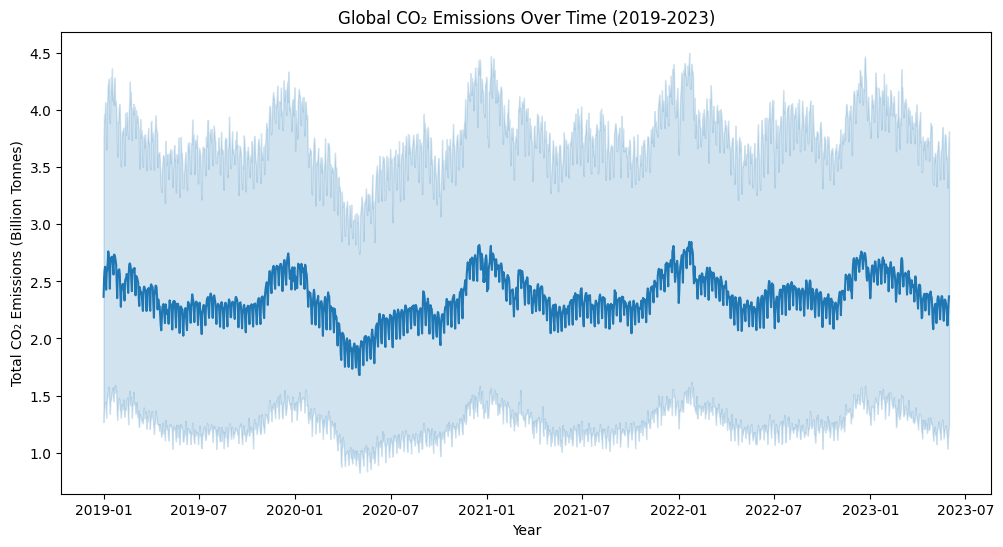

In [ ]:
# The df_CO dataframe contains historical CO2 data
# We will use this dataframe to show a longer time period

# Convert 'date' to datetime objects
df_CO['date'] = pd.to_datetime(df_CO['date'], format='%d/%m/%Y')


plt.figure(figsize=(12,6))
sns.lineplot(data=df_CO, x='date', y='value')
plt.title('Global CO₂ Emissions Over Time (2019-2023)')
plt.xlabel('Year')
plt.ylabel('Total CO₂ Emissions (Billion Tonnes)')
plt.show()

# This chart shows the emission rate over 4 years from 2019 to 2023.

* It shows a steady increase of emissions while also highlighting peak peroids at the beginning of each year

# 2. which countries contributed the most co2 in this period?

/tmp/ipython-input-2859208313.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_emitters, x='value', y='country', palette='Reds_r')


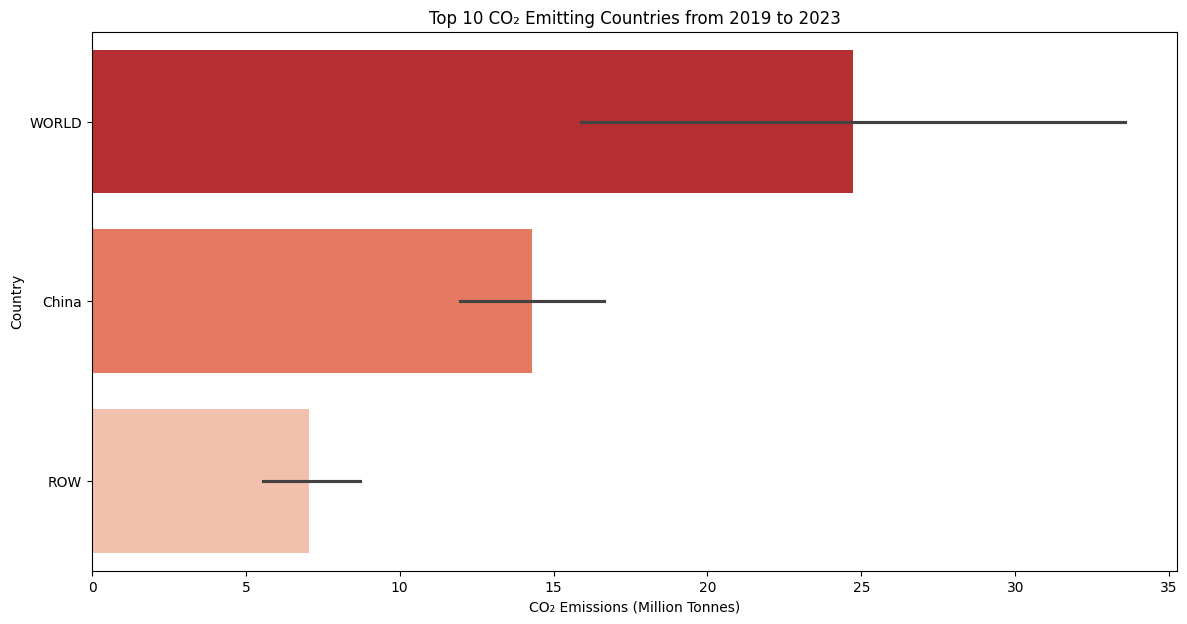

In [ ]:
plt.figure(figsize=(14,7))
sns.barplot(data=top_emitters, x='value', y='country', palette='Reds_r')
plt.title(f'Top 10 CO₂ Emitting Countries from 2019 to 2023')
plt.xlabel('CO₂ Emissions (Million Tonnes)')
plt.ylabel('Country')
plt.show()


# The chart above shows the countries with the most CO2 emissions during the timeline ;

* Its obvious World the most emissions by far (I'm guessing "World is name used to represent other countries that weren't measured)

##Why this matters;
This helps us to track and monitor countries with tthe mmost emissions

# 3. Which sector contributes most to global co2 emissions?

/tmp/ipython-input-101364384.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=sector_emissions, x='value', y='sector', palette='viridis')


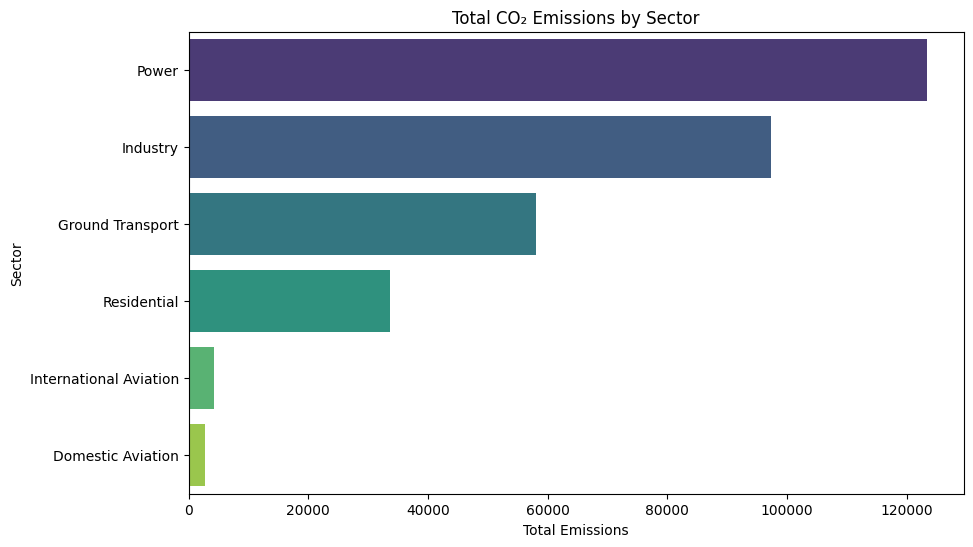

In [ ]:

# Aggregate emissions by sector
sector_emissions = df_CO.groupby('sector')['value'].sum().reset_index().sort_values('value', ascending=False)

# Plot
plt.figure(figsize=(10,6))
sns.barplot(data=sector_emissions, x='value', y='sector', palette='viridis')
plt.title("Total CO₂ Emissions by Sector")
plt.xlabel("Total Emissions")
plt.ylabel("Sector")
plt.show()


# From the chart above, it shows the sectors that contribute most co2 emissions, which is 5he power sector.

* The power sector pushes more eissons most likly because of nuclear power plants, fossil fuels etc.

* the industry sector would definitely be influenced by manufacturing and factory operations

## Why this matters

* This shows us that the power and industry sectors nedd heavy regulation to cut emissions


# 4. How have emissions from different sectors changed over time ?

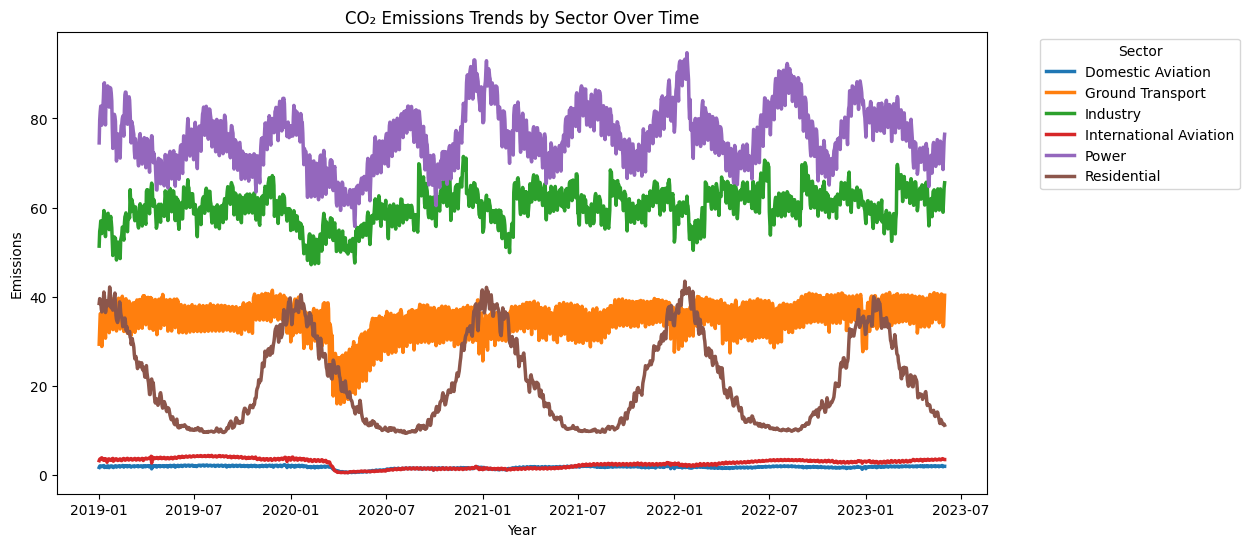

In [ ]:
# Aggregate by date and sector
sector_trend = df_CO.groupby(['date', 'sector'])['value'].sum().reset_index()

plt.figure(figsize=(12,6))
sns.lineplot(data=sector_trend, x='date', y='value', hue='sector', linewidth=2.5)
plt.title("CO₂ Emissions Trends by Sector Over Time")
plt.xlabel("Year")
plt.ylabel("Emissions")
plt.legend(title='Sector', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


# The chart above shows the relationshi between the emissions of different sectors.

* Domestic and international both have similar emission rates over the years
* Residential shows a fluntuating but predictable predicton rate, with peak peroids at the start of each year, while ground transport shows a relatively stable emission rate
 * the power and industry sector show simlar emission patterns

 ##Why it matters;

 * Reveals how industrial and energy-related emissions have evolved — key for understanding policy impact.

# 5. What is the Global emission rate of each country?


In [26]:
# Aggregate emissions per year and country
emission_trend = df_CO.groupby(['date', 'country'])['value'].sum().reset_index()

fig = px.line(
    emission_trend,
        x='date',
            y='value',
                color='country',
                    title="Global CO₂ Emissions Over Time by Country",
                        labels={'value':'Emissions', 'date':'Year'},
                            hover_name='country'
                            )
fig.update_layout(
    template='plotly_dark',
        legend_title_text='Country',
            hovermode='x unified'
            )
fig.show()

# This interactive chart shows the emission rate of each country

**Why it matters;**

* This allows us to track the emission rate of each countr

# 6. How does each country's CO2 profile differ by sector?

In [27]:
# Aggregate total emissions per country and sector
country_sector = df_CO.groupby(['country', 'sector'])['value'].sum().reset_index()

# Create interactive stacked bar chart
fig = px.bar(
    country_sector,
        x='country',
            y='value',
                color='sector',
                    title='CO₂ Emissions by Sector for Each Country',
                        labels={'value':'CO₂ Emissions', 'country':'Country'},
                            hover_name='country'
                            )
fig.update_layout(
 barmode='stack',
template='plotly_dark',
 xaxis_tickangle=-45,
 legend_title_text='Sector',
 hovermode='x unified'
)
fig.show()

# The interactive chart above shows the the breakdown of sector emission by country

**Why it matters;**
* It reveals economic and industrial differences — for example, one country’s emissions might come mostly from transport, another from manufacturing

# CO₂ Emissions Dashboard Summary

This dashboard provides insights into global CO₂ emissions from 2019 to 2023, highlighting trends across time, countries, and sectors.

**Global Emissions Trends (2019-2023):**

*   Global CO₂ emissions show a general upward trend during this period, with notable peaks at the beginning of each year.

**Top Emitting Countries:**

*   Analysis of the latest available data indicates that the "WORLD" category (likely representing aggregated data from many countries), China, and "ROW" (Rest of World) are the top contributors to CO₂ emissions.

**Sectoral Contributions:**

*   The **Power** sector is the largest contributor to total CO₂ emissions, followed by the **Industry** sector. This suggests that energy production and industrial activities are key areas for emission reduction efforts.

**Sectoral Trends Over Time:**

*   The **Power** and **Industry** sectors exhibit similar emission patterns over time, while **Ground Transport** shows a relatively stable rate. **Residential** emissions fluctuate with predictable peaks, likely influenced by seasonal energy demands. **Domestic** and **International Aviation** show similar emission rates.

**Global Emission Rate by Country:**

*   The interactive chart reveals the emission rate of each country over time, allowing for granular tracking and comparison of individual country performance.

**Country-Specific Sectoral Breakdown:**

*   Analyzing emissions by sector for each country highlights economic and industrial differences. For example, some countries' emissions are primarily driven by transport, while others are dominated by manufacturing. This breakdown is crucial for developing targeted emission reduction strategies.

**Overall, this dashboard provides a snapshot of recent global CO₂ emissions, identifying major sources and trends, and offering a basis for further detailed analysis and policy development.**